In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)
# (48000,28,28) 크기인 train_input이 (48000,28,28,1) 크기인 train_scaled가 되었다

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',input_shape=(28,28,1),padding='same'))
# 이 합성곱 층은 32개의 필터(뉴런 개수) 사용, 커널(입력에 곱하는 가중치)의 사이즈는 (3,3), 렐루 활성화 함수와 same 패딩을 사용한다

In [6]:
model.add(keras.layers.MaxPooling2D(2))
# 현재 합성곱 - 풀링

In [7]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 두번째 합성곱, 풀링

이제 이 3차원 특성 맵을 일렬로 펼칠 차례
이렇게 하는 이유는 마지막에 10개의 뉴런을 가진 출력층에서 확률을 계산하기 때문이다
여기서는 특성맵을 바로 일렬로 펼쳐서 전달하지 않고 중간에 하나의 밀집 은닉층을 두겠다


In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

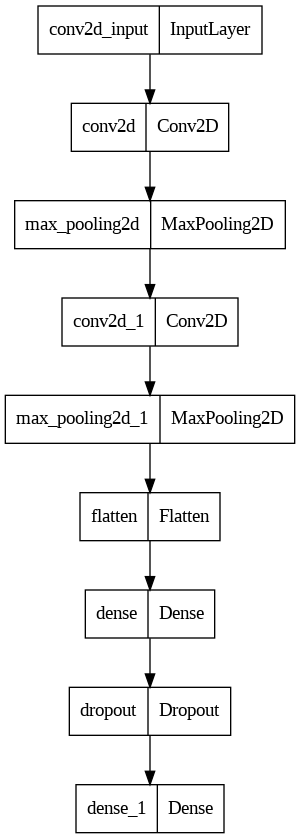

In [10]:
keras.utils.plot_model(model)

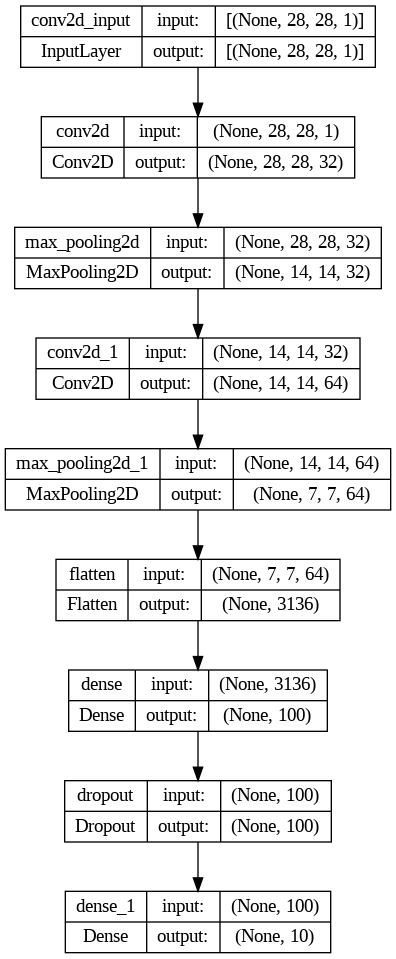

In [11]:
keras.utils.plot_model(model,show_shapes=True)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs =20, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 70s 46ms/step - loss: 0.4277 - accuracy: 0.8457 - val_loss: 0.3223 - val_accuracy: 0.8832
Epoch 2/20
   3/1500 [..............................] - ETA: 49s - loss: 0.2456 - accuracy: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 63s 42ms/step - loss: 0.2827 - accuracy: 0.8970 - val_loss: 0.3156 - val_accuracy: 0.8853
Epoch 3/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2372 - accuracy: 0.9130 - val_loss: 0.2557 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2042 - accuracy: 0.9245 - val_loss: 0.2296 - val_accuracy: 0.9166
Epoch 5/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.1780 - accuracy: 0.9336 - val_loss: 0.2293 - val_accuracy: 0.9183
Epoch 6/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.1541 - accuracy: 0.9422 - val_loss: 0.2497 - val_accuracy: 0.9154
Epoch 7/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1299 - accuracy: 0.9520 - val_loss: 0.2285 - val_accuracy: 0.9230
Epoch 8/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.1128 - accuracy: 0.9571 - val_loss: 0.2392 - val_accura

## 훈련 세트의 정확도가 이전보다 훨씬 좋아졌다 !!

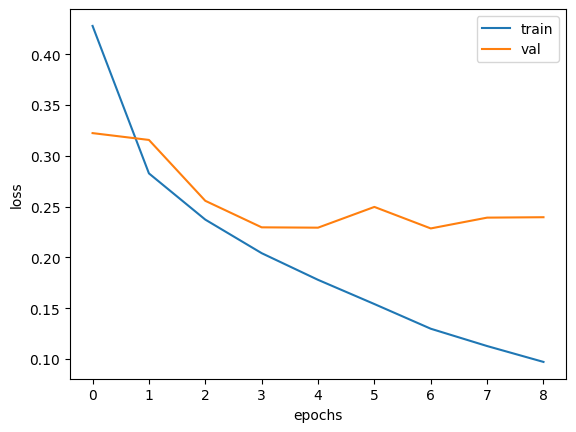

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
# 9번째 에포크가 최적이구나 !
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 19ms/step - loss: 0.2285 - accuracy: 0.9230


[0.2285323143005371, 0.9229999780654907]

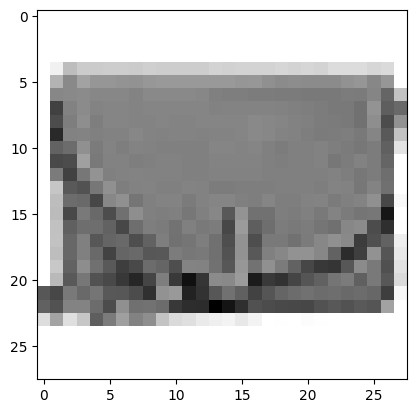

In [17]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [18]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 189ms/step
[[1.7566688e-07 2.5366340e-10 4.7869958e-10 1.3076750e-12 1.0654373e-10
  1.6363461e-11 1.5318372e-07 8.3134051e-09 9.9999964e-01 1.0337658e-08]]


여기서 슬라이싱을 사용하는 이유는 케라스의 fit(), predict(), evaluate()등은 모두 입력의 첫 번째 차원이 배치 차원일 것으로 기대한다
따라서 샘플 하나를 전달할 때 (28,28,1)이 아니라 (1,28,28,1) 크기를 전달해야 한다
배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지된다

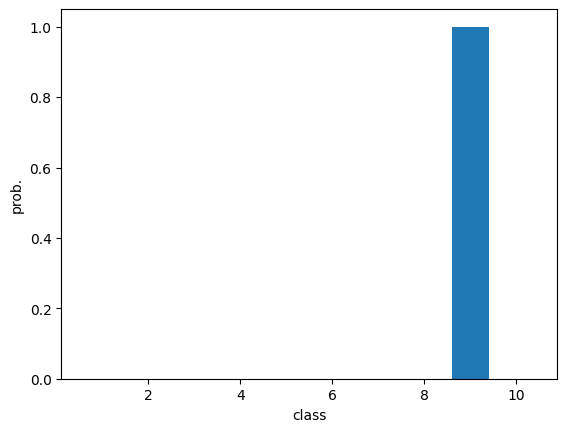

In [19]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2541 - accuracy: 0.9110


[0.2540794610977173, 0.9110000133514404]

### 항상 테스트 세트는 모델을 출시하기 직전 딱 한 번만 사용해야 한다
그렇지 않다면 모델을 실전에 투입했을 때 성능을 올바르게 예측하지 못한다
### 합성곱 신경망은 이미지를 주로 다루기 때문에 각 층의 출력을 시각화하기 좋다
